# **LAB: LOGISTIC REGRESSION**
Packages used:
 - `statsmodels` is meant for "conducting statistical tests, and statistical data exploration" it is technically more similar to R in its function, syntax and general use;
 - `sklearn` is meant for prediction; knowledge of scikit-learn is a very valuable skill nowadays, so I thought it best to include it;
 - and of course, `pandas` for data wrangling and organizing, as well as `matplotlib` and `seaborn` for pictures.


## **0. Preliminaries.**

Import the necessary packages:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import statsmodels.api as sm

sns.set_theme(style="darkgrid")

We'll work with the `Smarket` dataset, which contains the percentage returns for the S&P 500 stock index over $1250$ days, from $2001$ to $2005$. For each date, the dataset contains the percentage returns for each of the five previous trading days, stored in the columns `Lag1` through `Lag5`.
The column `Volume` corresponds to the number of shares traded on the previous day (in billions), `Today|` the percentage return on the date, and `Direction` whether the market was up or down on this date.

This dataset is part of the ISLR package; a .csv version is available in the data folder. 

We use `df.describe()` to get a summary of our data.

In [2]:
df = pd.read_csv('data/Smarket.csv')
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


pandas DataFrames have a `.corr()` method that displays the correlation matrix. It ignores categorical variables by default.

In [3]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


Look at the `Today` column: the values are pretty small, which (as one would expect) means the returns of the day have little to do with the returns of the previous days. There does seem to be a substantial correlation between `Year` and `Volume`. Let's plot our data to check:

<AxesSubplot:xlabel='Year', ylabel='Volume'>

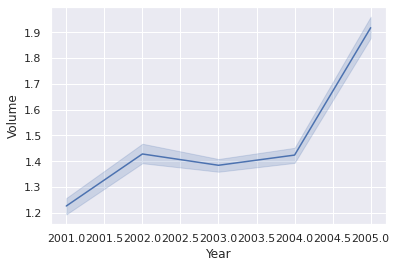

In [4]:
sns.lineplot(x='Year', y='Volume', data=df)

The volume traded increased between 2001 and 2005: that's a positive correlation, which is what we got in our correlation matrix.

## **1. Logistic Regression**
We fit a logistic regression model to try to predict `Direction` in terms of `Lag1` through `Lag5`, and `Volume`.

First, we convert our categorical variable to a dummy variable.

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df['Direction_Up']

### 1.1 Basic syntax.
`statsmodels`'s Logistic Regression function is called `Logit()`:

In [7]:
X_sm = sm.add_constant(X)
logit_sm = sm.Logit(y, X_sm)
logit_sm_res = logit_sm.fit()
print(logit_sm_res.summary())

Optimization terminated successfully.
         Current function value: 2.197001
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 06 Oct 2020   Pseudo R-squ.:                     inf
Time:                        13:58:11   Log-Likelihood:                -2746.3
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


(I'll just ignore the warning...)

The p-values are all fairly large; the only low-ish one is for `Lag1`, and even this one is quite high. So it seems that the direction of the market can't be predicted well from the figures of the previous days.

To access just the coefficients, we look at the `params` attribute of the fitted model.

In [8]:
logit_sm_res.params

const    -0.126000
Lag1     -0.073074
Lag2     -0.042301
Lag3      0.011085
Lag4      0.009359
Lag5      0.010313
Volume    0.135441
dtype: float64

The p-values are stored in the `pvalues` attribute (duh):

In [9]:
logit_sm_res.pvalues

const     0.600700
Lag1      0.145232
Lag2      0.398352
Lag3      0.824334
Lag4      0.851445
Lag5      0.834998
Volume    0.392404
dtype: float64

The method `.predict()` returns the predictions of our fitted model; by default, those predictions are done using the training data. Here, we get an array with 1250 entries (our original number of observations) corresponding to the probability that the market will go up each day. In other words, the $i$-th element in the array is $P(Y=1 \vert X_i)$. 

In [10]:
logit_sm_res.predict()

array([0.50708413, 0.48146788, 0.48113883, ..., 0.5392683 , 0.52611829,
       0.51791656])

To check how our model did, we can use the `pred_table()` method to display a confusion matrix. 

In [11]:
logit_sm_res.pred_table()

array([[145., 457.],
       [141., 507.]])

Diagonal entries indicate correct predictions and off-diagonal ones indicate incorrect predictions. So our model predicted the market direction in $145+507 = 652$ cases, that is, we got a training error rate of $47.8\%$. Considering the training error is often overly optimistic, it's... not great.

Before we move on, let's go over the syntax for `sklearn`'s logit models.

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logit_sk = LogisticRegression()
logit_sk.fit(X, y)

LogisticRegression()

p-values aren't implemented (and likely never will be) in `sklearn` so we'll skip to evaluating our model directly. 

We get our predictions with the `predict()` method. We can also call `predict_proba()` to get the probabilities (as we did above) and `predict_log_proba()` for the log-probabilities.

In [14]:
logit_sk.predict(X)

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

To get the proportion of correct predictions, we call the `score()` method, passing the observations (here $X$) and the true values ($y$).

In [15]:
logit_sk.score(X, y)

0.5208

### 1.2. Train/test splits.

To get a better idea of the true error rate, we might want to evaluate our model on observations it hasn't seen before; so we divide our data into a _training set_, which we'll use to fit our model, and a _test set_, on which we'll make predictions.

This notion is explored in detail in Chapter 5 of ISLR (Resampling methods); for now, we'll use years 2001 to 2004 as our training set and year 2005 as our test set. 

In [16]:
df_train = df.loc[df['Year'] < 2005]
df_test = df.loc[df['Year'] == 2005]

We prepare our independent variables for `statsmodels` as follows:

In [17]:
X_train = df_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_test = df_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = df_train['Direction_Up']
y_test = df_test['Direction_Up']
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [18]:
logitsm_split = sm.Logit(y_train, X_train_sm) 
logitsm_split_res = logitsm_split.fit()
print((logitsm_split_res).summary())

Optimization terminated successfully.
         Current function value: 3.346650
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Tue, 06 Oct 2020   Pseudo R-squ.:                     inf
Time:                        13:58:14   Log-Likelihood:                -3340.0
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.

/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


Again, let's just ignore the warning...

As far as I've seen, there's no `statsmodels` method to evaluate our predictions directly (since `pred_table` doesn't allow to pass a test set). We can, however, do it with pandas; the following code makes a dataframe with our predictions, then returns the confusion matrix:

In [19]:
pred_sm = pd.Series(data=logitsm_split_res.predict(X_test_sm))
pred_sm = pred_sm.apply(lambda x : int(x > 0.5))
pd.crosstab(y_test, pred_sm)

col_0,0,1
Direction_Up,,
0,77,34
1,97,44


The test error rate is $52\%$, worse than random guessing. Oh, well... 
Before we try to do something about it, let's review the `sklearn` syntax:

In [20]:
logitsk_split = LogisticRegression()
logitsk_split.fit(X_train, y_train)
logitsk_split.score(X_test, y_test)

0.48412698412698413

Easy peasy.

To try and improve our model, we look back to our original regression: the variable `Lag1` had the smallest p-value; why not try to refit our model with just `Lag1` and `Lag2`?

In [21]:
X_train2 = df_train[['Lag1', 'Lag2']]
X_test2 = df_test[['Lag1', 'Lag2']]
X_train_sm2 = sm.add_constant(X_train2)
X_test_sm2 = sm.add_constant(X_test2)

In [22]:
logitsm_split2 = sm.Logit(y_train, X_train_sm2)
logitsm_split2_res = logitsm_split2.fit() 
print(logitsm_split2_res.summary())

Optimization terminated successfully.
         Current function value: 2.875695
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Oct 2020   Pseudo R-squ.:                     inf
Time:                        13:58:14   Log-Likelihood:                -2869.9
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.063      0.508      0.611      -0.092       0.156
Lag1          -0.0556      0.

/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/keroubino/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [23]:
pred_sm2 = pd.Series(data=logitsm_split2_res.predict(X_test_sm2))
pred_sm2 = pred_sm2.apply(lambda x : int(x > 0.5))
pd.crosstab(y_test, pred_sm2)

col_0,0,1
Direction_Up,,
0,35,76
1,35,106


This looks a little better: we have a successful prediction in $56\%$ of the cases. That said, predicting the market would go up in all cases would also have resulted in a $56\%$. Not so great.

Let's wrap up with `sklearn`:

In [24]:
logitsk_split2 = LogisticRegression()
logitsk_split2.fit(X_train2, y_train)
logitsk_split2.score(X_test2, y_test)

0.5595238095238095

To obtain the confusion matrix, we call `sklearn.metrics.confusion_matrix()`:

In [25]:
y_pred2 = logitsk_split2.predict(X_test2)
sklearn.metrics.confusion_matrix(y_test, y_pred2)

array([[ 35,  76],
       [ 35, 106]])

So the accuracy rate in case of 'Up' prediction is

In [26]:
106/(106+76)

0.5824175824175825

This is a small silver lining: when the model predicts the market will go up, it is correct in $58\%$ of the cases. We could possibly build a trading strategy where we buy stocks on days the model predicts an increase in the market, and do nothing on other days. 

This small improvement, however, might just be due to random chance, so further investigation is needed...

## **2. Linear discriminant analysis.**
`statsmodels` does not support linear discriminant analysis as of yet so we'll do this bit with `sklearn` only; we'll use the same train/test split as above.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train2, y_train)

LinearDiscriminantAnalysis()

We can access our estimates by calling the various attributes of our `lda` object:
 - `classes_` lists the different classes (here 0 for 'Down' and 1 for 'Up');
 - `priors_` the priors $P(Y = k)$ corresponding to each class $k$ (in the order listed in `classes_`;
 - `means_` the class-wise means of each predictor (eg. `lda.means_[0][1]` is the mean of `Lag2` (the second predictor) over all observations where $Y = 0$);

In [28]:
print("Classes:", lda.classes_,
     "\nPrior probabilities:", lda.priors_,
     "\nGroup means:\n", lda.means_)

Classes: [0 1] 
Prior probabilities: [0.49198397 0.50801603] 
Group means:
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


We can predict what class an element will belong to with the `predict()` and `predict_proba()` methods:

In [39]:
lda_pred = lda.predict(X_test2)
print("Confusion matrix:\n", sklearn.metrics.confusion_matrix(y_test, lda_pred),
      "\nAccuracy score:", lda.score(X_test2, y_test))

Confusion matrix:
 [[ 35  76]
 [ 35 106]] 
Accuracy score: 0.5595238095238095


The performance is remarkably similar to that of the logistic regression model.

There is no out-of-the-box option to adjust prediction threshold (eg. to predict the market will go down only if the probability of it is greater than 90%) but we can do it manually with eg.:

In [30]:
np.where(lda.predict_proba(X_test2)[:,0] > .9)

(array([], dtype=int64),)

As a bonus, let's visualize our decision boundary.

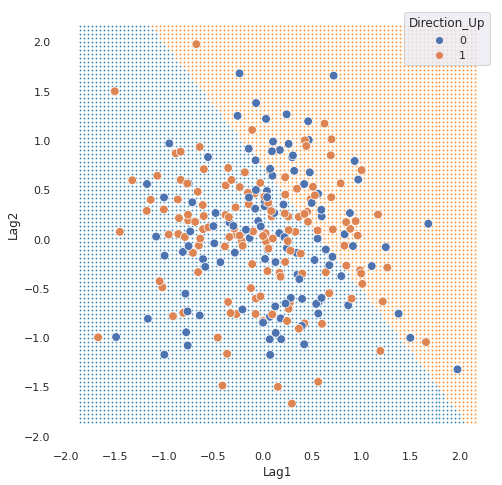

In [31]:
fig, ax = plt.subplots(figsize=(8,8))

ax.grid(b=None)
ax.set(facecolor='w', aspect=1)

sns.scatterplot(x='Lag1', y='Lag2', data=df_test, hue='Direction_Up', s=75, zorder=2)


x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

nx, ny = 100, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = np.c_[xx.ravel(), yy.ravel()]
plt.scatter(Z[np.where(lda.predict(Z) == 1)][:, 0], Z[np.where(lda.predict(Z) == 1)][:, 1], 
            s=1, c='tab:blue', alpha=0.7, zorder=1)
plt.scatter(Z[np.where(lda.predict(Z) == 0)][:, 0], Z[np.where(lda.predict(Z) == 0)][:, 1], 
            s=1, c='tab:orange', alpha=0.7, zorder=1);

## **3. Quadratic discriminant analysis.**
The syntax for this is very similar to that of LDA:

In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train2, y_train)

print("Classes:", qda.classes_,
     "\nPrior probabilities:", qda.priors_,
     "\nGroup means:\n", qda.means_)

Classes: [0 1] 
Prior probabilities: [0.49198397 0.50801603] 
Group means:
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [40]:
qda_pred = qda.predict(X_test2)
print("Confusion matrix:\n", sklearn.metrics.confusion_matrix(y_test, qda_pred),
      "\nAccuracy score:", qda.score(X_test2, y_test))

Confusion matrix:
 [[ 30  81]
 [ 20 121]] 
Accuracy score: 0.5992063492063492


That's a little bit better! We have almost a 60% accuracy score. On the plot, the decision boundary now appears curved.

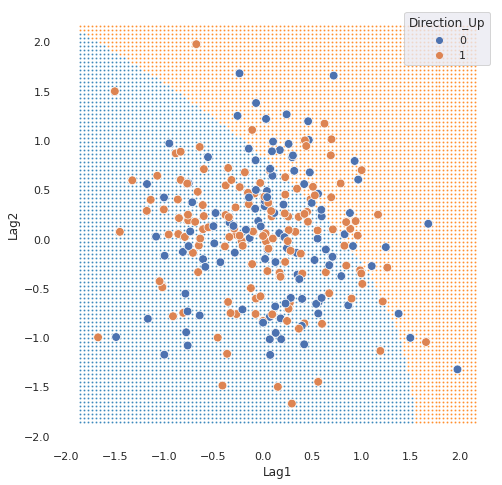

In [55]:
fig, ax = plt.subplots(figsize=(8,8))

ax.grid(b=None)
ax.set(facecolor='w', aspect=1)

sns.scatterplot(x='Lag1', y='Lag2', data=df_test, hue='Direction_Up', s=75, zorder=2)


x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

nx, ny = 100, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = np.c_[xx.ravel(), yy.ravel()]
plt.scatter(Z[np.where(qda.predict(Z) == 1)][:, 0], Z[np.where(qda.predict(Z) == 1)][:, 1], 
            s=1, c='tab:blue', alpha=0.7, zorder=1)
plt.scatter(Z[np.where(qda.predict(Z) == 0)][:, 0], Z[np.where(qda.predict(Z) == 0)][:, 1], 
            s=1, c='tab:orange', alpha=0.7, zorder=1);

## **4. K-nearest neighbours.**
We'll now see how a nonparametric model performs against parametric ones. Again, `statsmodels` does not support $K$-nearest neighbours, so we'll use `sklearn`.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train2, y_train)

print("Confusion matrix:\n", sklearn.metrics.confusion_matrix(knn1.predict(X_test2), y_test),
     "\nScore:", knn1.score(X_test2, y_test))

Confusion matrix:
 [[43 58]
 [68 83]] 
Score: 0.5


That's... not great. Let's try to increase $k$:

In [73]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train2, y_train)

print("Confusion matrix:\n", sklearn.metrics.confusion_matrix(knn3.predict(X_test2), y_test),
     "\nScore:", knn3.score(X_test2, y_test))

Confusion matrix:
 [[48 55]
 [63 86]] 
Score: 0.5317460317460317


Slightly better. Can we improve this further?

In [76]:
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train)

    print("k =", k, "score:", knn.score(X_test2, y_test))

k = 1 score: 0.5
k = 2 score: 0.48412698412698413
k = 3 score: 0.5317460317460317
k = 4 score: 0.5158730158730159
k = 5 score: 0.48412698412698413
k = 6 score: 0.49603174603174605
k = 7 score: 0.4642857142857143
k = 8 score: 0.48412698412698413
k = 9 score: 0.49603174603174605
k = 10 score: 0.5198412698412699
k = 11 score: 0.5317460317460317
k = 12 score: 0.5158730158730159
k = 13 score: 0.503968253968254
k = 14 score: 0.45634920634920634
k = 15 score: 0.48412698412698413


Looks like we can't. For comparison, here are the decision boundary visualizations (in somewhat low definition) for $k=1, 5, 10$ and $15$.

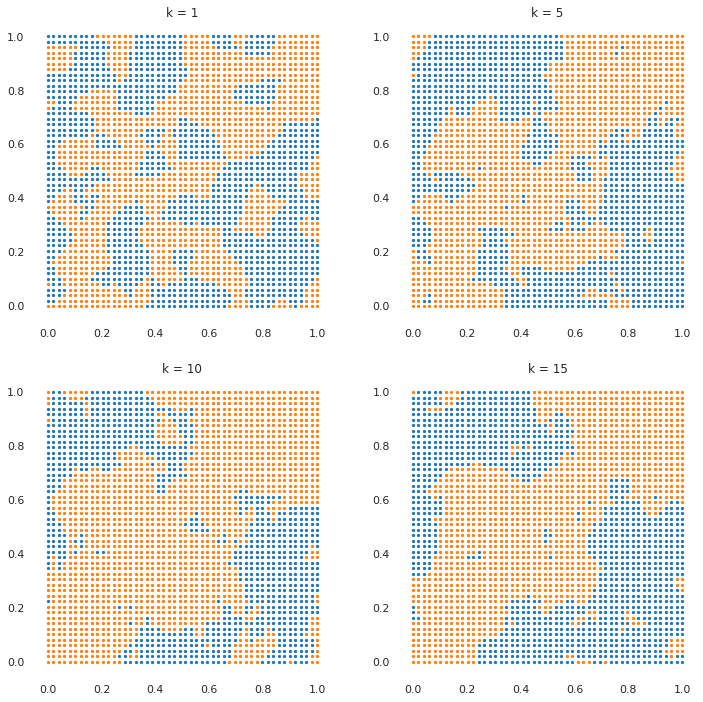

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

k = [1, 5, 10, 15]
i = 0

for ax in axes.flat:
    ax.grid(b=None)
    ax.set(facecolor='w', aspect=1, title=f"k = {k[i]}")
    
    plt.sca(ax)

    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()

    nx, ny = 50, 50
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = np.c_[xx.ravel(), yy.ravel()]
    
    knn.set_params(n_neighbors=k[i])
    
    plt.scatter(Z[np.where(knn.predict(Z) == 1)][:, 0], Z[np.where(knn.predict(Z) == 1)][:, 1], 
            s=5, marker='o', c='tab:blue', zorder=1)
    plt.scatter(Z[np.where(knn.predict(Z) == 0)][:, 0], Z[np.where(knn.predict(Z) == 0)][:, 1], 
            s=5, marker="o", c='tab:orange', zorder=1);
    
    i += 1

The decision boundary appears to smoothen somewhat as $k$ increases, with fewer "pockets" of color and larger overall areas.

## **5. Application: Caravan Insurance Data.**
We wrap up with the `Caravan` dataset, available from the ISLR package and provided here as a .csv file. This dataset consists of 85 predictors measuring demographic charactersitics for 5,822 individuals.

Our dependent variable is `Purchase`, indicating whether a given individual purchases a caravan insurance policy. Only 6% of the people in the dataset purchased one.

In [110]:
caravan = pd.read_csv("data/Caravan.csv")
caravan['Purchase'].describe()

count     5822
unique       2
top         No
freq      5474
Name: Purchase, dtype: object

The main issue with KNN is that of scale: since we look at the points _nearest_ to our obesrvation to perform a classification, we need to have a notion of distance that is robust to different scales and units (eg. a difference of USD $1000$ in annual salary is small, but a difference of $50$ years in age is big).

The best way to insure we are judging things on the same scale is to _standardize_ our data, by subtracting the mean from every feature (hence all features have a mean of 0) and dividing each feature by its standard deviation (so all features have a standard deviation of 1).

Note: This is not the only possible way to scale our data. See [here](https://sklearn.org/auto_examples/preprocessing/plot_all_scaling.html) for a comparison of scalers `sklearn` has to offer and their uses.

First we look at the mean and standard deviation of (some of) the features in our dataset:

In [113]:
X = caravan.drop(columns='Purchase')
y = caravan['Purchase']

print("Mean:\n", X.mean(),
     "\n\nStandard deviation:\n", X.std())

Mean:
 MOSTYPE     24.253349
MAANTHUI     1.110615
MGEMOMV      2.678805
MGEMLEEF     2.991240
MOSHOOFD     5.773617
              ...    
AZEILPL      0.000515
APLEZIER     0.006012
AFIETS       0.031776
AINBOED      0.007901
ABYSTAND     0.014256
Length: 85, dtype: float64 

Standard deviation:
 MOSTYPE     12.846706
MAANTHUI     0.405842
MGEMOMV      0.789835
MGEMLEEF     0.814589
MOSHOOFD     2.856760
              ...    
AZEILPL      0.022696
APLEZIER     0.081632
AFIETS       0.210986
AINBOED      0.090463
ABYSTAND     0.119996
Length: 85, dtype: float64


To scale our data, we use the `StandardScaler` class from `sklearn.preprocessing`; we fit the scaler to our predictor dataframe, then apply the `transform()` method to it. 

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(caravan.drop(columns='Purchase'))
X_scaled = pd.DataFrame(data=scaler.transform(X), columns=X.columns)
print("Mean:\n", X_scaled.mean(),
     "\n\nStandard deviation:\n", X_scaled.std())

Mean:
 MOSTYPE    -1.015639e-16
MAANTHUI   -5.891695e-16
MGEMOMV     5.059123e-17
MGEMLEEF    2.968433e-16
MOSHOOFD    3.783378e-17
                ...     
AZEILPL    -1.518214e-16
APLEZIER   -9.635599e-16
AFIETS     -3.440795e-16
AINBOED     6.019413e-16
ABYSTAND   -1.696465e-16
Length: 85, dtype: float64 

Standard deviation:
 MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64


`scaler.transform()` returns an array, so if we want to keep our column names we can make it into a dataframe. Note that the mean and standard deviation is not exactly equal to 1, but for the purpose of predicting things, that's fine.

We now split our observations: for the test, we'll take the first 1000 rows, and the training set will be the rest. We then fit a KNN model (with $K = 1$) on our data and evaluate the performance on the test set.

In [128]:
X_train = X_scaled.iloc[1000:]
X_test = X_scaled.iloc[:1000]
y_train = y.iloc[1000:]
y_test = y.iloc[:1000]

knn_car = KNeighborsClassifier(n_neighbors=1)
knn_car.fit(X_train, y_train)
knn_car.score(X_test, y_test)

0.882

So our error rate is just under 12%. Not bad, eh? Except...

In [149]:
y_test.value_counts()['Yes'] / y_test.size

0.059

...only 6% of purchases are a 'Yes', so predicting 'No' for every observation would result in a 6% error rate.

That said, maybe the total error rate is not the right metric we should use; ultimately, if our plan is to sell insurance to clients, we want to target the customers that are more likely to buy our product. So a better question to ask is, when our model preditcs someone will purchase insurance, how often is that prediction true?

Let's display our confusion matrix:

In [150]:
sklearn.metrics.confusion_matrix(knn_car.predict(X_test), y_test)

array([[873,  50],
       [ 68,   9]])

Among the 77 customers KNN predicts will buy insurance (second row), 9 really do (bottom right). So we are right in $11.7\%$ of cases, which is far better than random guessing (which would be right in at most $6\%$ of cases).

Let's see whether we can improve our rate.

In [151]:
knn_car.set_params(n_neighbors=3)
sklearn.metrics.confusion_matrix(knn_car.predict(X_test), y_test)

array([[921,  54],
       [ 20,   5]])

With $K = 3$, we have a true negative rate of $20\%$.

In [183]:
knn_car.set_params(n_neighbors=5)
sklearn.metrics.confusion_matrix(knn_car.predict(X_test), y_test)

array([[930,  55],
       [ 11,   4]])

With $K = 5$ we reach $27\%$. There is not much point in increasing $K$ further, however: once our number of neighbors becomes large enough, the KNN algorithm will automatically pick up more "No"'s than "Yes"'s, since these are overwhelmingly present in the data.

To conclude, we compare KNN with logistic regression. Note: the fit with default parameters was throwing a "max iterations reached" warning so I increased it to 125 (default is 100) so it converges.

In [184]:
logit_car = LogisticRegression(max_iter=125)
logit_car.fit(X_train, y_train)
sklearn.metrics.confusion_matrix(logit_car.predict(X_test), y_test)

array([[934,  59],
       [  7,   0]])

So our model does not pick up any true "Yes". We can try to play with the probability threshold a bit; what if we make it declare a customer as a "yes" if the probability is $25\%$ or above?

In [195]:
true_pos = np.intersect1d(np.where(logit_car.predict_proba(X_test)[:,1] > 0.25)[0], 
               np.where(y_test == "Yes")[0]).size
total_pos = np.where(logit_car.predict_proba(X_test)[:,1] > 0.25)[0].size
print("True positives:", true_pos,
     "\nTotal predicted:", total_pos,
     "\nAccuracy:", true_pos/total_pos)

True positives: 11 
Total predicted: 35 
Accuracy: 0.3142857142857143


This time we get an accuracy of $31\%$. Not bad.